# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Faisal Rabbani Sitompul]
- **Email:** [faisalrabbanisitompul@gmail.com]
- **ID Dicoding:** [owlninj4]

## Menentukan Pertanyaan Bisnis

1. Customer Segmentation

Siapa pelanggan terbaik berdasarkan perilaku penyewaan mereka (frekuensi, recency, dan jumlah total penyewaan)?

2. Retention Strategy

Pelanggan mana yang perlu ditargetkan untuk meningkatkan loyalitas atau mencegah churn?

3. Marketing Optimization

Segmen pelanggan mana yang paling cocok untuk promosi atau diskon?

4. Customer Lifetime Value (CLV)

Bagaimana memprioritaskan pelanggan berdasarkan nilai jangka panjang mereka?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

#### Membaca data hour.csv

In [2]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Membaca data day.cvs

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Insight dari `day.csv`
1. **Jumlah Pengguna Harian**: `cnt` menunjukkan total pengguna per hari.
2. **Pengguna Berdaftar vs. Tidak Berdaftar**: `registered` dan `casual` membedakan antara pengguna berdaftar dan kasual.
3. **Pengaruh Cuaca**: `weathersit` dapat membantu mengukur pengaruh kondisi cuaca terhadap penggunaan.
4. **Suhu dan Kelembaban**: `temp` dan `hum` dapat digunakan untuk menganalisis dampak lingkungan pada jumlah pengguna.
5. **Hari Kerja vs. Akhir Pekan**: `workingday` menunjukkan perbedaan jumlah pengguna antara hari kerja dan akhir pekan.
6. **Musim**: `season` menunjukkan pengaruh musim terhadap jumlah pengguna.

#### Insight dari `hour.csv`
1. **Jumlah Pengguna per Jam**: `cnt` menunjukkan total pengguna per jam.
2. **Pengguna Berdaftar vs. Tidak Berdaftar**: `registered` dan `casual` mengidentifikasi perbedaan antara pengguna berdaftar dan kasual per jam.
3. **Pengaruh Cuaca**: `weathersit` mempengaruhi jumlah pengguna per jam.
4. **Suhu dan Kelembaban**: `temp` dan `hum` untuk menganalisis dampak suhu dan kelembaban per jam.
5. **Hari Kerja vs. Akhir Pekan**: `workingday` memberikan perbandingan jumlah pengguna antara hari kerja dan akhir pekan per jam.
6. **Jam**: `hr` membantu dalam analisis tren penggunaan berdasarkan jam dalam sehari.

## Assessing Data

#### Assesing data hour.csv

In [4]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Assesing data day.csv

In [7]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pengguna terdaftar (registered) secara konsisten lebih banyak daripada pengguna kasual di kedua dataset.
- Variabel seperti suhu, kelembapan, dan kecepatan angin berpotensi memengaruhi pola penggunaan sepeda.
- Penggunaan harian lebih fluktuatif

## Cleaning Data

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Kolom dteday bertipe object meskipun menyimpan data tanggal. Idealnya, kolom ini seharusnya dikonversi menjadi tipe datetime.
- Mengahpus kolom 'instant', Kolom ini tampaknya adalah indeks unik untuk setiap baris, yang redundan karena DataFrame sudah memiliki indeks bawaan. 

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['instant'], inplace=True)

Cek kembali "dteday"

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


## Exploratory Data Analysis (EDA)

### 1. Statistik Deskriptif

Mendapatkan gambaran umum tentang distribusi dan skala data.

In [15]:
# Statistik deskriptif
hour_df.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
# Statistik deskriptif
day_df.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


`hour_df`:
- **Jumlah Observasi**: 17,379 Jam

`day_df`:
- **Jumlah Observasi**: 731 Hari

### 2. Missing Values & Data Types

Memastikan tidak ada missing values dan tipe data sesuai.

In [17]:
# Cek missing values
print("Missing Values:\n", hour_df.isnull().sum())

# Tipe data
print("\nData Types:\n", hour_df.dtypes)

Missing Values:
 dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Types:
 dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [18]:
# Cek missing values
print("Missing Values:\n", day_df.isnull().sum())

# Tipe data
print("\nData Types:\n", day_df.dtypes)

Missing Values:
 dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data Types:
 dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


### 3. Distribusi Variabel Numerik

Memahami distribusi variabel utama seperti cnt, temp, hum, dan windspeed.

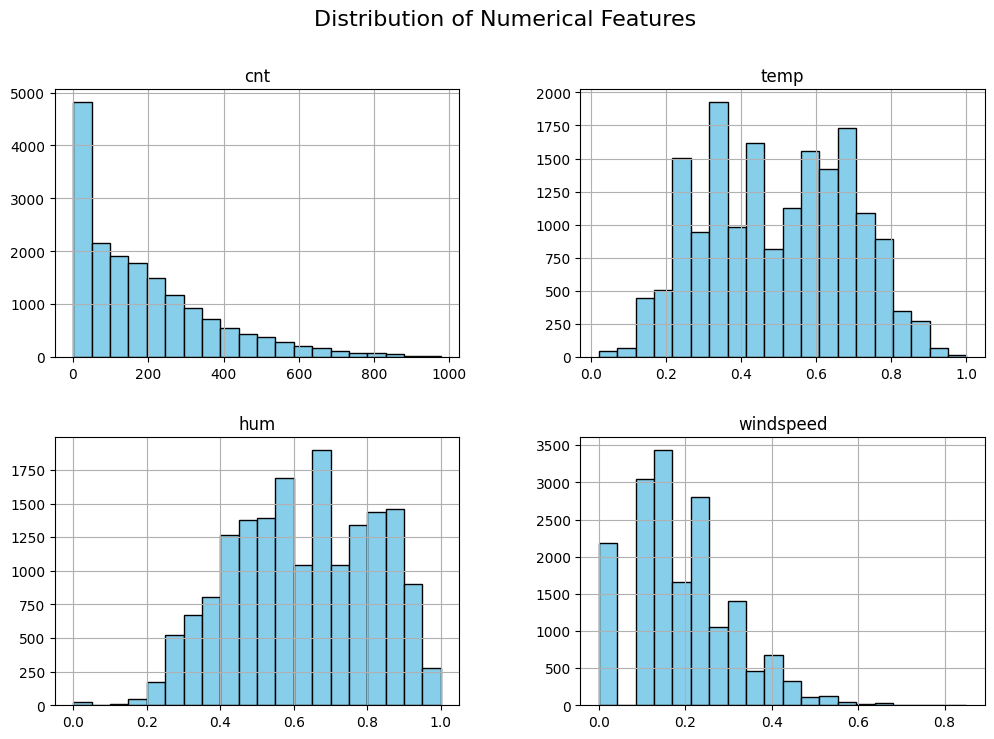

In [19]:
# Distribusi variabel numerik
numerical_features = ['cnt', 'temp', 'hum', 'windspeed']
hour_df[numerical_features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


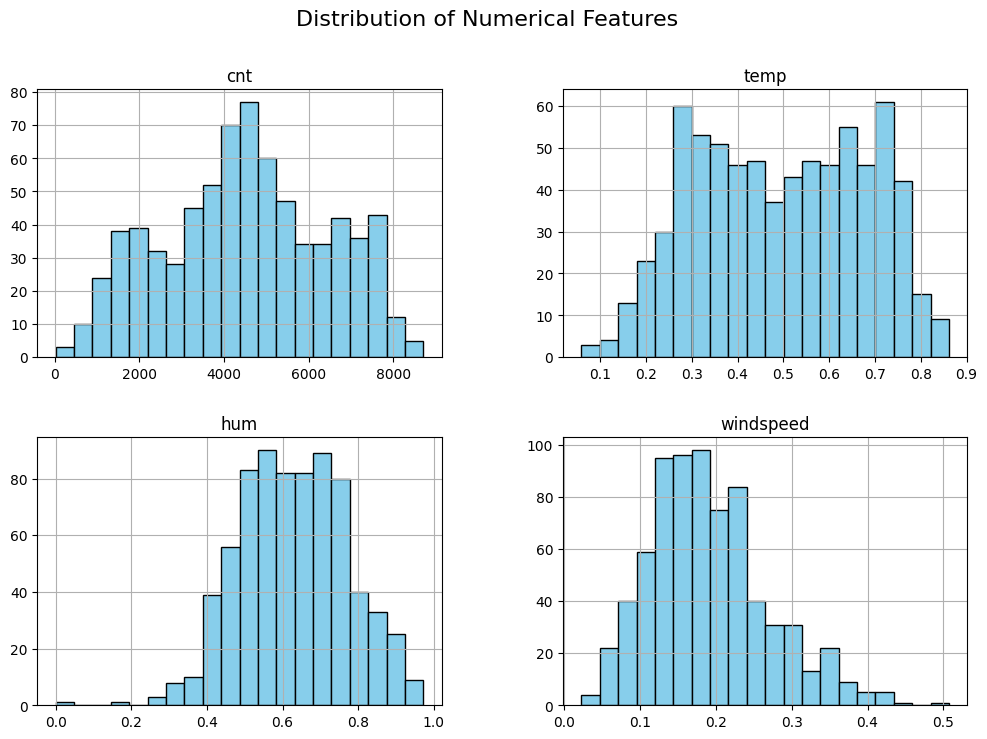

In [20]:
# Distribusi variabel numerik
numerical_features = ['cnt', 'temp', 'hum', 'windspeed']
day_df[numerical_features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


### 4. Analisis Korelasi

Melihat hubungan antar variabel numerik.

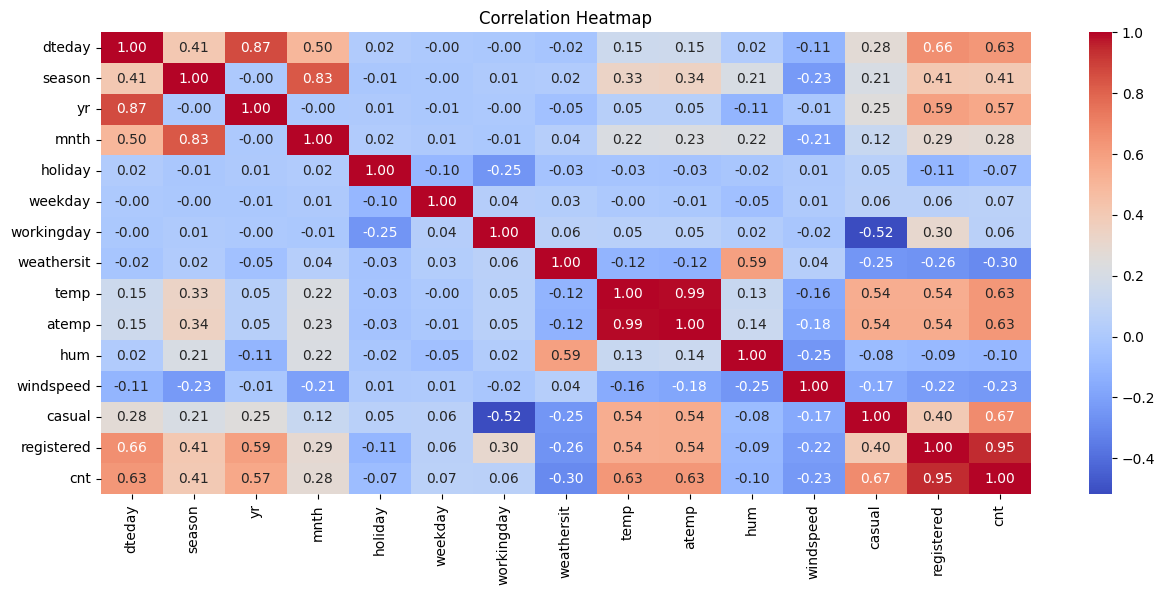

In [21]:
# Heatmap korelasi
plt.figure(figsize=(15, 6))
sns.heatmap(day_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

### 5. Analisis Tren Waktu

Memahami pola penyewaan berdasarkan waktu (jam, hari, bulan).

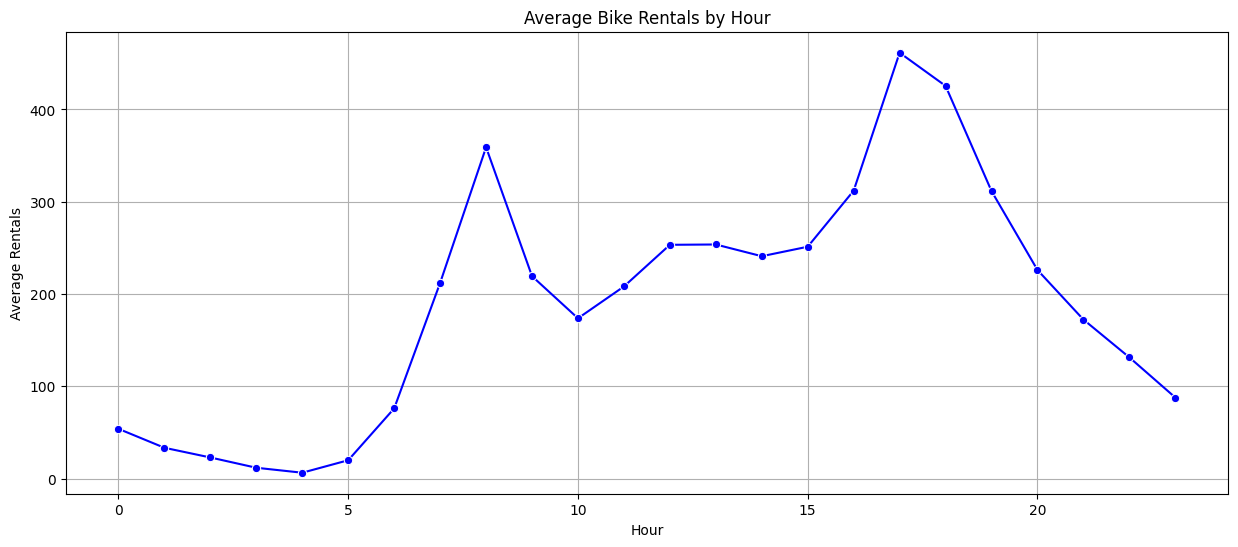

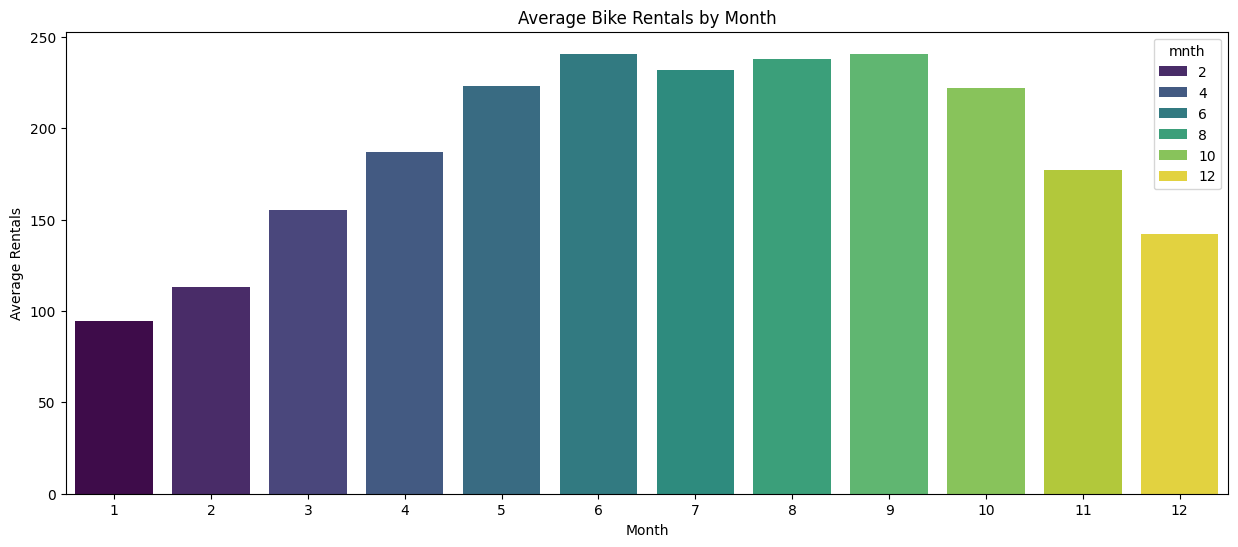

In [22]:
# Penyewaan berdasarkan waktu (per jam)
hourly_rentals = hour_df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o', color='blue')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.show()

# Penyewaan berdasarkan bulan
monthly_rentals = hour_df.groupby('mnth')['cnt'].mean().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(data=monthly_rentals, x='mnth', y='cnt', hue='mnth', palette='viridis')
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.show()

**Insight:**
- Waktu penyewaan sepeda tertinggi terjadi pada Pagi dan Sore hari
- Pertengan Tahun merupakan waktu tertingi penyewaan sepeda

### 6. Distribusi Berdasarkan Kategori

Memahami pengaruh variabel kategori seperti season, holiday.

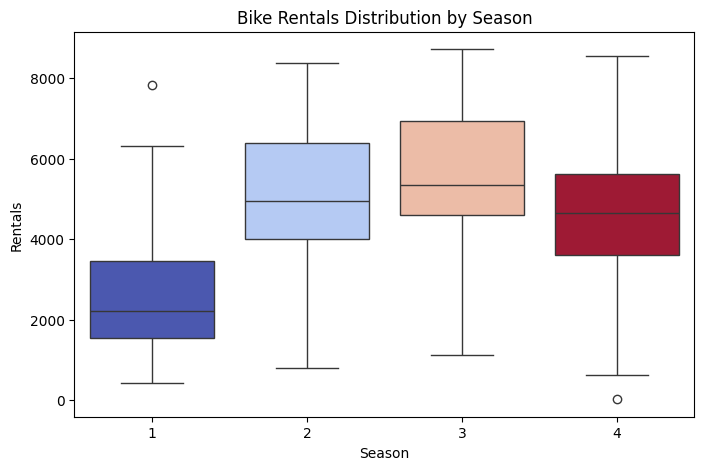

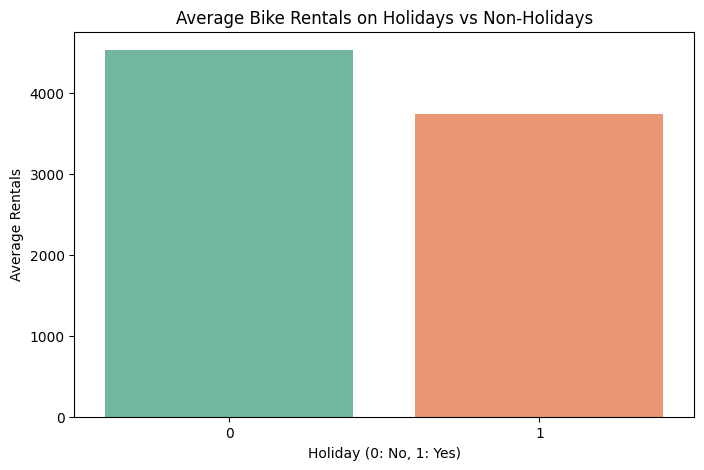

In [23]:
# Distribusi penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='season', y='cnt', hue='season', palette='coolwarm', legend=False)
plt.title('Bike Rentals Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Rentals')
plt.show()

# Penyewaan berdasarkan hari libur
holiday_rentals = day_df.groupby('holiday')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_rentals, x='holiday', y='cnt', hue='holiday', palette='Set2', legend=False)
plt.title('Average Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Average Rentals')
plt.show()

**Insight:**
- Musim semi memiliki distribusi penyewaan yang lebih rendah
- Pada Hari Libur penyewaan sepeda Lebih Rendah Dari pada Hari biasa

### 7. Analisis Variabel Penting

Memahami variabel yang paling memengaruhi penyewaan sepeda (cnt).

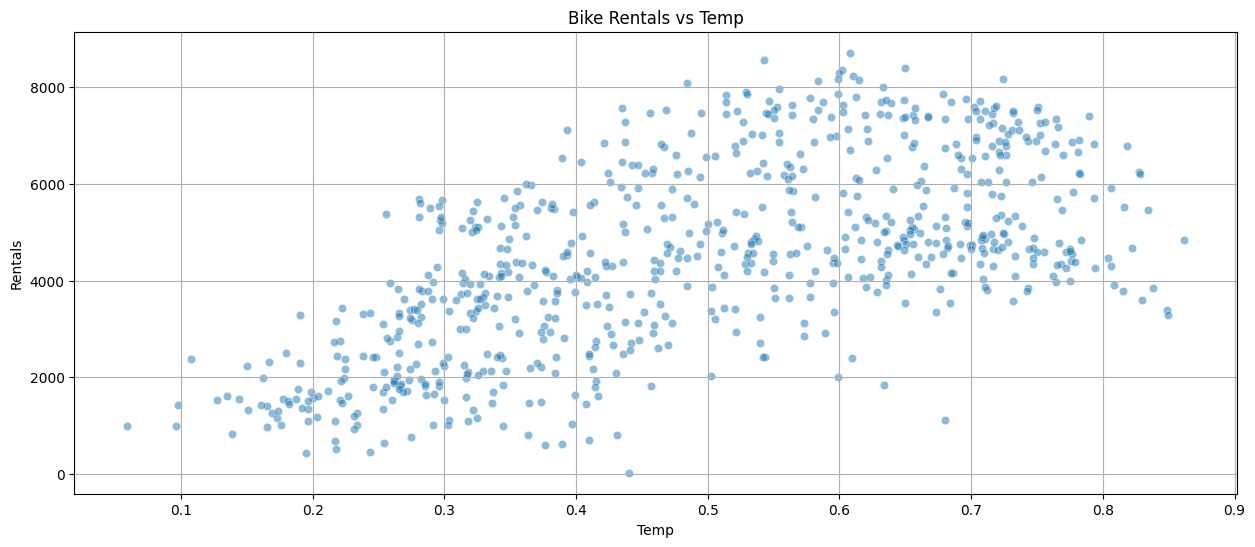

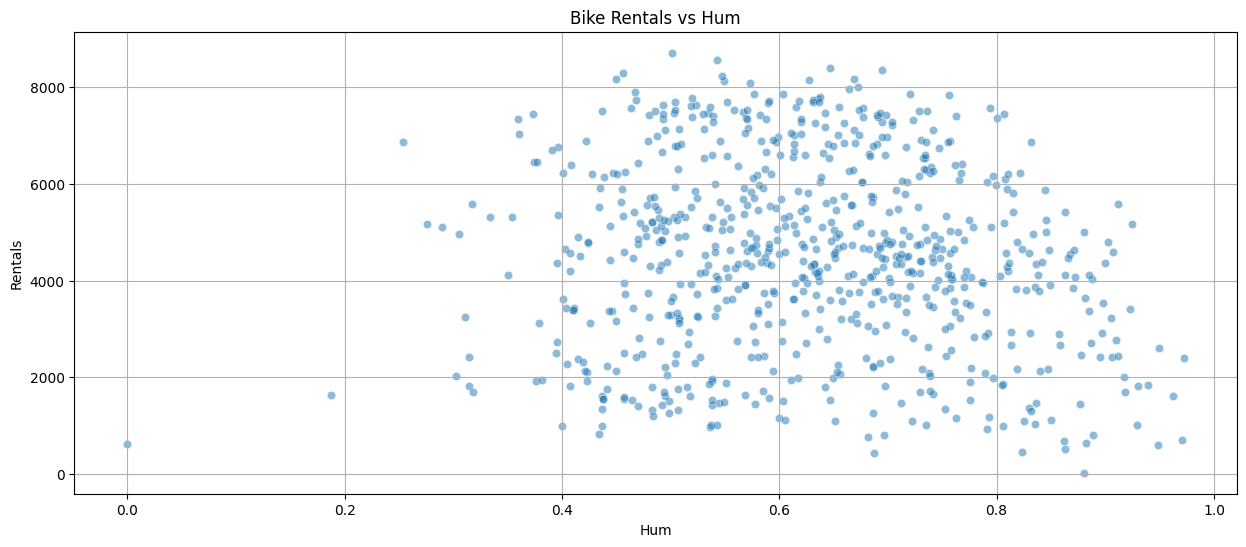

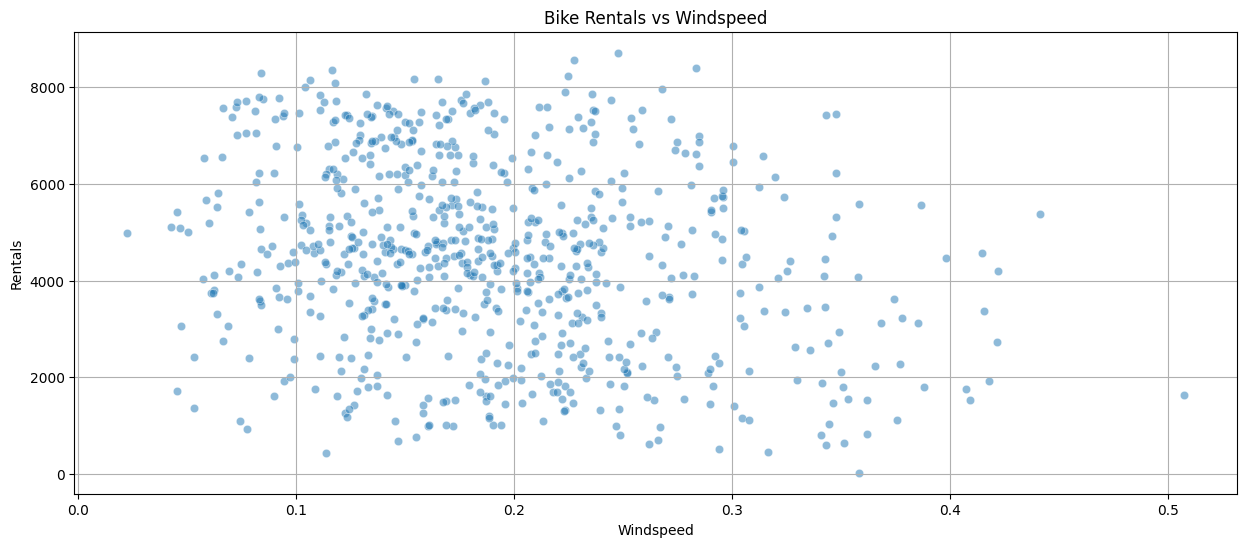

In [24]:
# Scatter plot antara cnt dan variabel penting
important_features = ['temp', 'hum', 'windspeed']
for feature in important_features:
    plt.figure(figsize=(15, 6))
    sns.scatterplot(data=day_df, x=feature, y='cnt', alpha=0.5)
    plt.title(f'Bike Rentals vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Rentals')
    plt.grid(True)
    plt.show()

**Insight:**
- Orang-orang jarang menyewa sepeda jika suhunya terlalu rendah
- Orang-orang jarang menyewa sepeda jika kelembapan terlalu kering
- Orang-orang jarang menyewa sepeda jika angin terlalu kencang

## Visualization & Explanatory Analysis

### Pertanyaan 1. Customer Segmentation (Siapa pelanggan terbaik?)

Mengidentifikasi pelanggan berdasarkan Recency, Frequency, dan Monetary Value (RFM).

#### 1. Distribusi Total Penyewaan :

Menunjukkan distribusi pelanggan berdasarkan total penyewaan mereka.

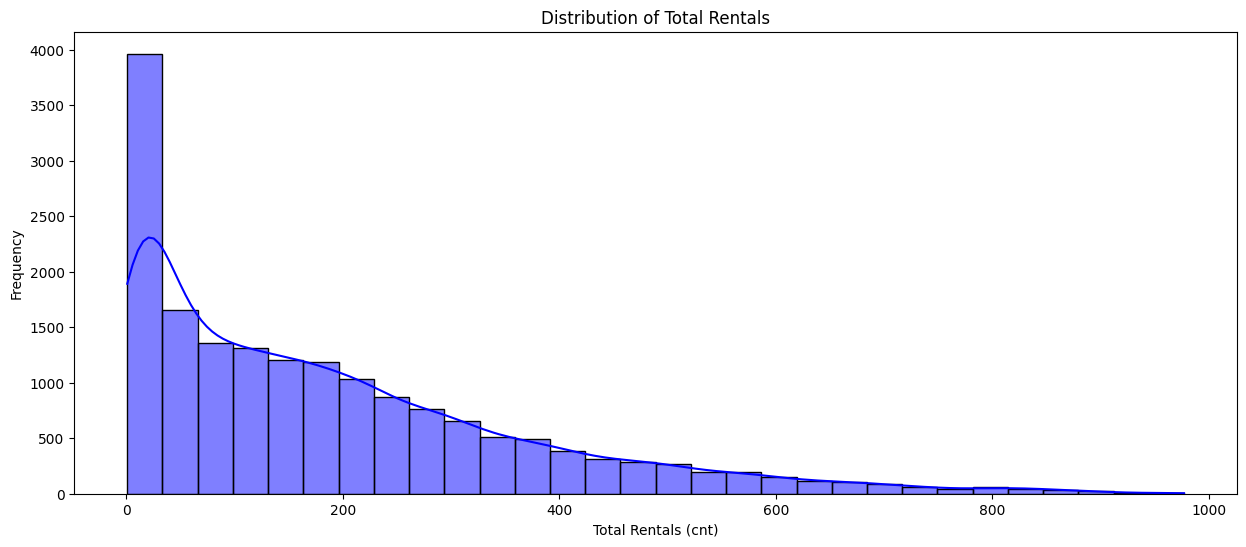

In [25]:
plt.figure(figsize=(15, 6))
sns.histplot(data=hour_df, x='cnt', kde=True, bins=30, color='blue')
plt.title('Distribution of Total Rentals')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Distribusi pelanggan termasuk kedalam Right-skewed distribution

#### 2. Korelasi Variabel :

Melihat korelasi antara variabel seperti casual, registered, cnt, temp, dan lainnya untuk memahami perilaku penyewaan.

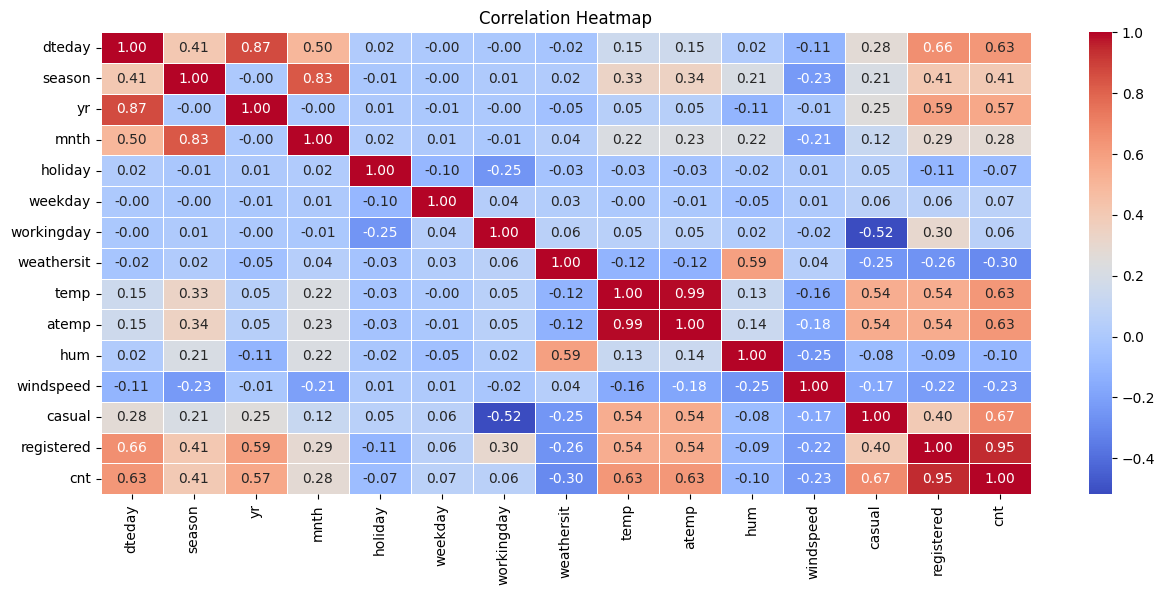

In [26]:
plt.figure(figsize=(15, 6))
sns.heatmap(day_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### 3. Frequency & Recency :

Membandingkan jumlah penyewaan berdasarkan pelanggan casual dan registered.

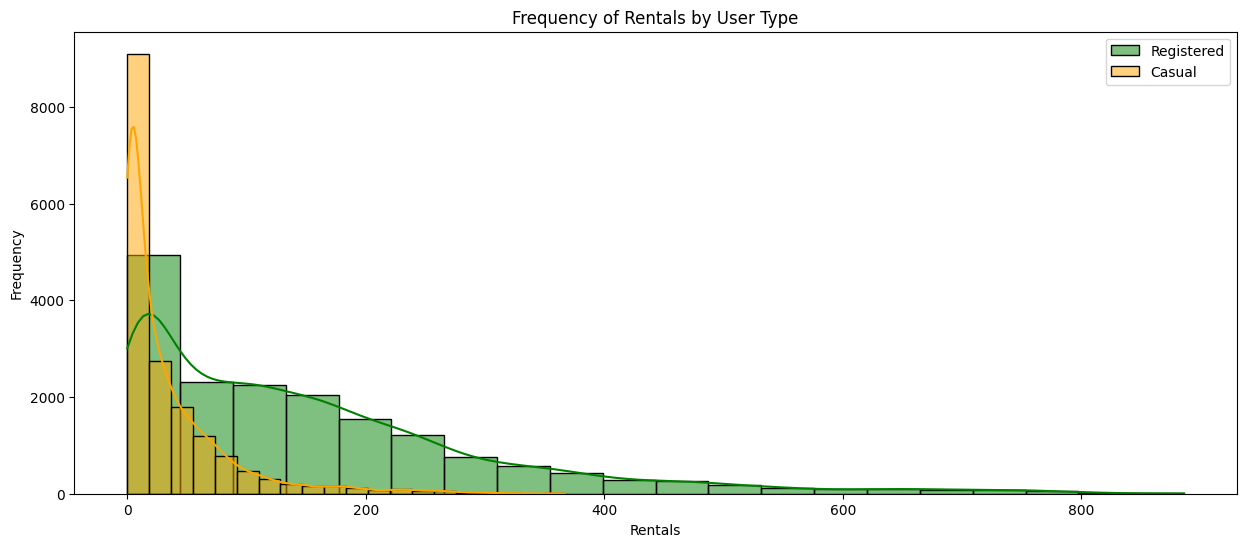

In [27]:
plt.figure(figsize=(15, 6))  # Mengatur ukuran gambar menjadi lebih lebar
sns.histplot(data=hour_df, x='registered', kde=True, bins=20, color='green', label='Registered')
sns.histplot(data=hour_df, x='casual', kde=True, bins=20, color='orange', label='Casual')
plt.legend()
plt.title('Frequency of Rentals by User Type')
plt.xlabel('Rentals')
plt.ylabel('Frequency')
plt.show()

**Insight:**
- Dapat dilihat kesamaan distribusi dari 2 tipe pelanggan yang termasuk kedalam Right-skewed distribution

### Pertanyaan 2. Retention Strategy (Siapa yang perlu ditargetkan?)

Mengidentifikasi pelanggan dengan potensi churn atau loyalitas rendah.

#### 1. Recency vs Frequency :

Menghubungkan frekuensi dan recency penyewaan untuk mengetahui pelanggan aktif dan kurang aktif.

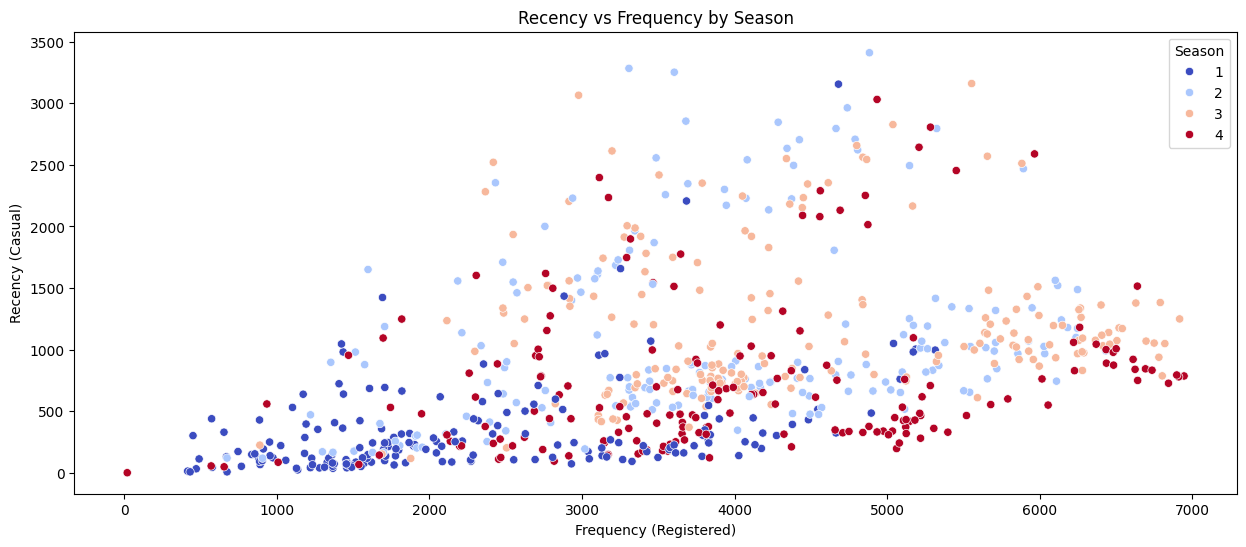

In [28]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=day_df, x='registered', y='casual', hue='season', palette='coolwarm')
plt.title('Recency vs Frequency by Season')
plt.xlabel('Frequency (Registered)')
plt.ylabel('Recency (Casual)')
plt.legend(title='Season')
plt.show()

**Insight:**
- Penyewa terdaftar lebih sedikit menyewa sepeda di musim semi Tapi total penyewaan sepeda masih lebih tinggi

#### 2. Tren Penyewaan dari Waktu ke Waktu:

Membandingkan tren penyewaan antara pelanggan casual dan registered.

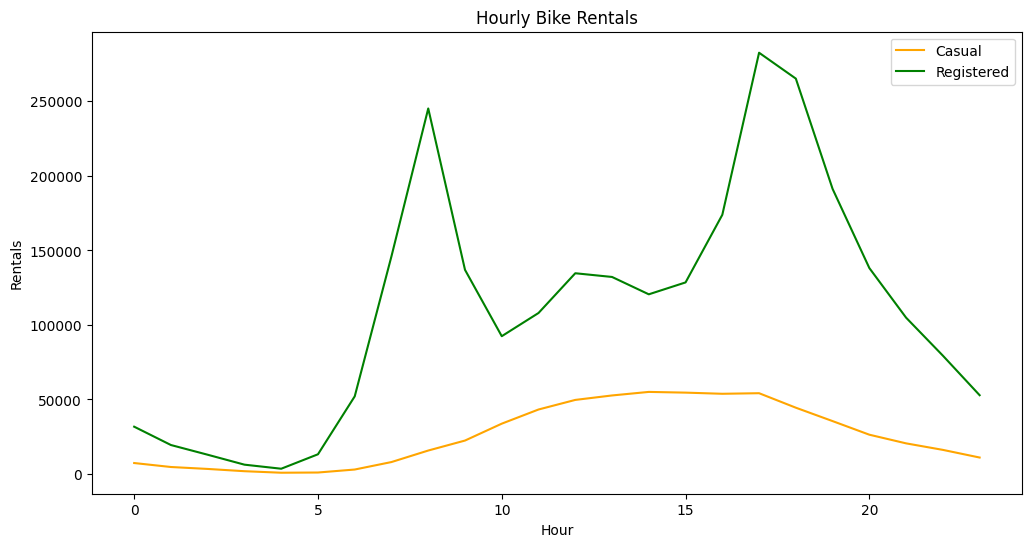

In [29]:
hour_df_excl_datetime = hour_df.select_dtypes(exclude=['datetime64'])

# Grouping berdasarkan jam dan menghitung total penyewaan
hourly_rentals = hour_df_excl_datetime.groupby('hr').sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='casual', label='Casual', color='orange')
sns.lineplot(data=hourly_rentals, x='hr', y='registered', label='Registered', color='green')
plt.title('Hourly Bike Rentals')
plt.xlabel('Hour')
plt.ylabel('Rentals')
plt.legend()
plt.show()


**Insight:**
- Ternyata penyewa casual yang cenderung menyewa sepeda pada Pagi dan Sore hari

### Pertanyaan 3. Marketing Optimization (Segmen mana untuk promosi?)

Mengidentifikasi segmen pelanggan untuk promosi atau diskon.

#### 1. Pengaruh Musim pada Total Penyewaan :

Membandingkan pola penyewaan di musim yang berbeda.

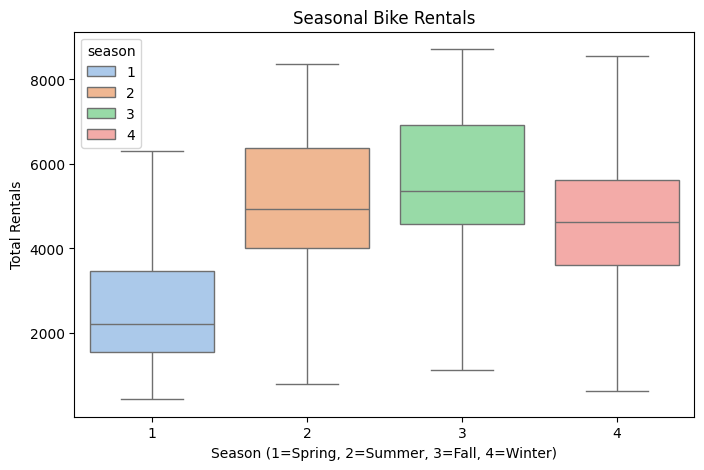

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='season', y='cnt', hue='season', palette='pastel', dodge=False, showfliers=False)
plt.title('Seasonal Bike Rentals')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Total Rentals')
plt.show()

**Insight:**
- Pada `Spring` perlu meningkatkan promosi

#### 2. Hari Kerja vs Libur :

Membandingkan jumlah penyewaan pada hari kerja (workingday=1) dan libur (holiday=1).

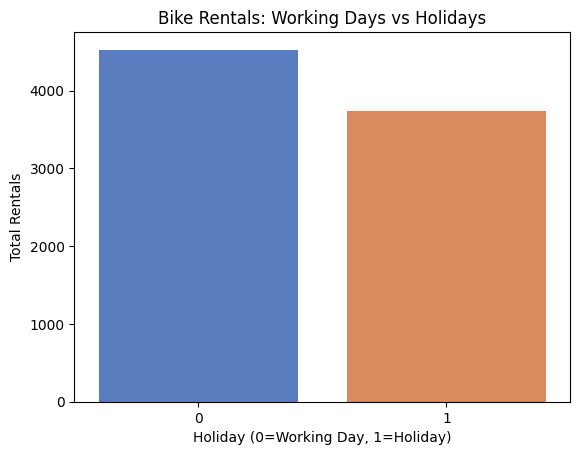

In [31]:
sns.barplot(data=day_df, x='holiday', y='cnt', hue='holiday', palette='muted', errorbar=None, dodge=False)
plt.title('Bike Rentals: Working Days vs Holidays')
plt.xlabel('Holiday (0=Working Day, 1=Holiday)')
plt.ylabel('Total Rentals')
plt.legend([], [], frameon=False)  # Menyembunyikan legenda
plt.show()

#### 3. Peak Hours :

Menemukan jam puncak untuk promosi.

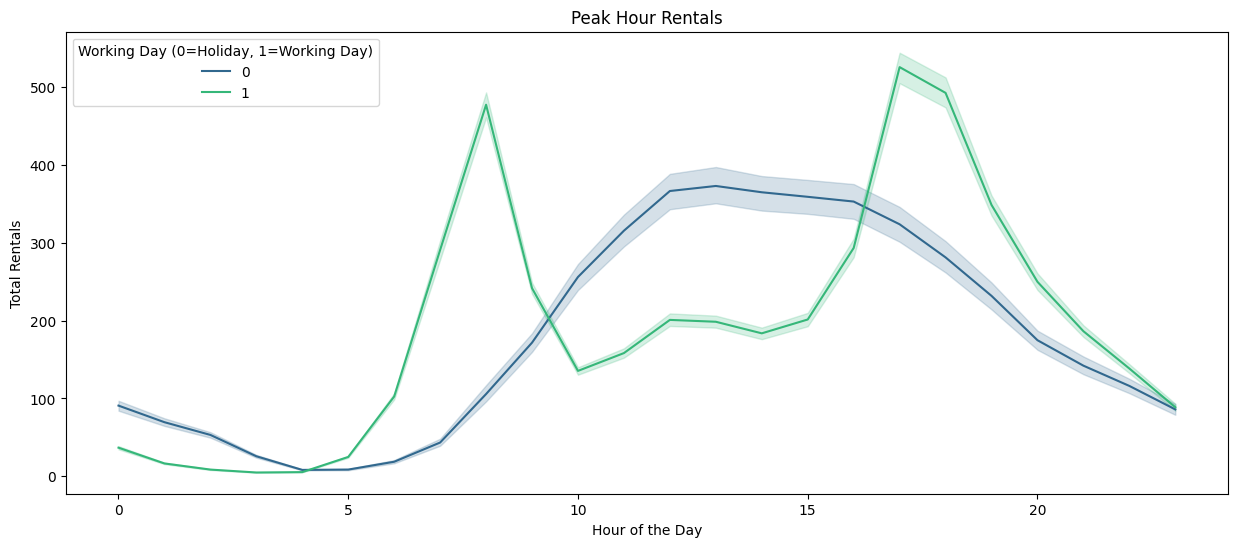

In [32]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='workingday', palette='viridis')
plt.title('Peak Hour Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.legend(title='Working Day (0=Holiday, 1=Working Day)')
plt.show()

**Insight:**
- Buat diskon / promosi pada siang hari di hari libur agar meningkatkan penyewaan

### Pertanyaan 4. Customer Lifetime Value (CLV)

Memprioritaskan pelanggan dengan nilai jangka panjang tinggi.

#### 1. Lifetime Penyewaan oleh Casual vs Registered :

Mengetahui total penyewaan sepanjang waktu berdasarkan jenis pelanggan.

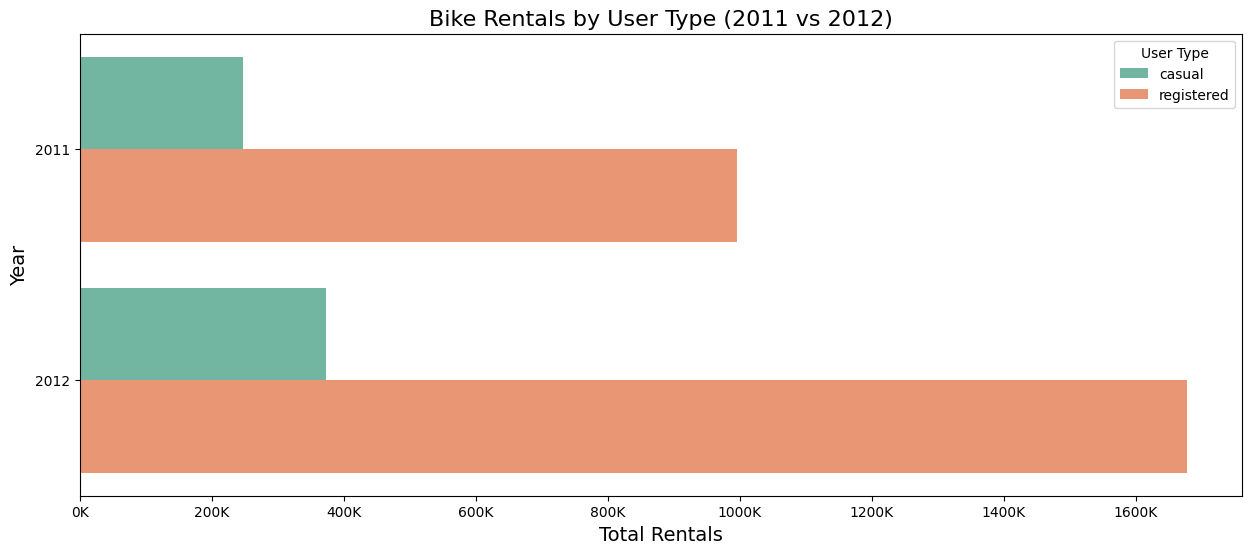

In [33]:
yearly_rentals = hour_df.groupby('yr')[['casual', 'registered', 'cnt']].sum().reset_index()
yearly_rentals['yr'] = yearly_rentals['yr'].replace({0: '2011', 1: '2012'})
yearly_rentals_melted = yearly_rentals.melt(id_vars='yr', value_vars=['casual', 'registered'], var_name='User Type', value_name='Rentals')
plt.figure(figsize=(15, 6))
# Plot the data
sns.barplot(data=yearly_rentals_melted, y='yr', x='Rentals', hue='User Type', palette='Set2')

# Add title and labels
plt.title('Bike Rentals by User Type (2011 vs 2012)', fontsize=16)
plt.ylabel('Year', fontsize=14)
plt.xlabel('Total Rentals', fontsize=14)

# Format the x-axis to display in thousands for clarity
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x/1000)}K'))

# Adjust the legend
plt.legend(title='User Type')

plt.show()


**Insight:**
- Berikan perhatian khusus pada pelanggan casual agar mendaftar karena jumlah pelangan casual masih tertinggal jauh

#### 2. Segmen CLV :

Mengelompokkan pelanggan berdasarkan RFM Analysis. 

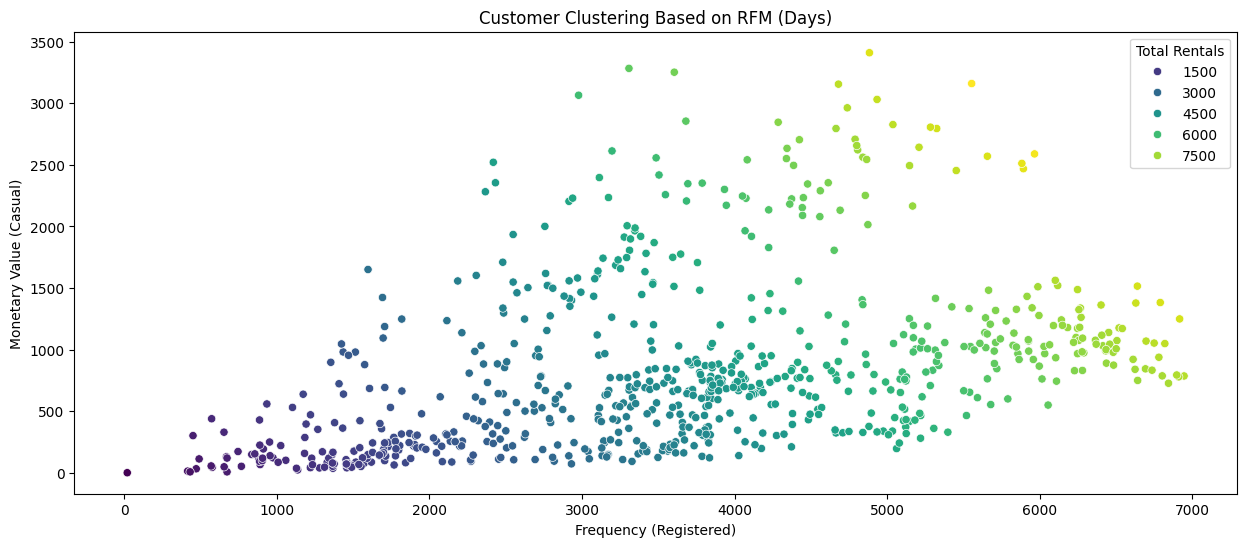

In [34]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=day_df, x='registered', y='casual', hue='cnt', palette='viridis')
plt.title('Customer Clustering Based on RFM (Days)')
plt.xlabel('Frequency (Registered)')
plt.ylabel('Monetary Value (Casual)')
plt.legend(title='Total Rentals')
plt.show()

## Analisis Lanjutan (Opsional)

### RFM Analysis

Memuat dan Memersiapkan Dataset

In [35]:
# Set the snapshot date as the latest date in the dataset (transaction date)
snapshot_date = hour_df['dteday'].max()

# Preview data
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Menghitung Recency (R)**

Recency dihitung berdasarkan index pengguna (yang diwakili oleh baris data). 

In [36]:
# Calculate Recency (days since last transaction)
hour_df['Recency'] = (snapshot_date - hour_df['dteday']).dt.days

# Menggunakan index sebagai pengganti user_id, jadi Recency akan dihitung per baris
recency_df = hour_df.groupby(hour_df.index)['Recency'].min().reset_index()

# Tampilkan Recency
recency_df.head()

,index,Recency
0,0,730
1,1,730
2,2,730
3,3,730
4,4,730


**Menghitung Frequency (F)**

Frequency dihitung berdasarkan seberapa sering setiap pengguna (setiap index) melakukan penyewaan.

In [37]:
# Frequency: Count how many times each user rented a bike (group by index)
frequency_df = hour_df.groupby(hour_df.index)['dteday'].count().reset_index()
frequency_df.columns = ['index', 'Frequency']

# Tampilkan Frequency
frequency_df.head()


,index,Frequency
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


**Menghitung Monetary (M)**

Monetary dihitung berdasarkan jumlah total penyewaan yang dilakukan oleh setiap pengguna

In [38]:
# Monetary: Total number of rentals by a user (sum of 'cnt' for each user)
monetary_df = hour_df.groupby(hour_df.index)['cnt'].sum().reset_index()
monetary_df.columns = ['index', 'Monetary']

# Tampilkan Monetary
monetary_df.head()


,index,Monetary
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1


**Menggabungkan RFM Data**

Setelah kita menghitung Recency, Frequency, dan Monetary, kita akan menggabungkan ketiganya berdasarkan index.

In [39]:
# Merge Recency, Frequency, and Monetary using index
rfm_df = pd.merge(frequency_df, monetary_df, on='index')
rfm_df = pd.merge(rfm_df, recency_df, on='index')

# Tampilkan dataframe RFM
rfm_df.head()


,index,Frequency,Monetary,Recency
0,0,1,16,730
1,1,1,40,730
2,2,1,32,730
3,3,1,13,730
4,4,1,1,730


**Menentukan RFM Skor**

Sekarang kita akan memberikan skor untuk setiap pengguna berdasarkan Recency, Frequency, dan Monetary menggunakan qcut untuk membagi setiap metrik menjadi 5 kuartil.

In [40]:
# Skoring dengan pd.cut
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'], bins=5, labels=[1, 2, 3, 4, 5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Gabungkan skor RFM menjadi satu
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Tampilkan hasil
rfm_df.head()

,index,Frequency,Monetary,Recency,R_Score,F_Score,M_Score,RFM_Score
0,0,1,16,730,1,3,1,131
1,1,1,40,730,1,3,2,132
2,2,1,32,730,1,3,2,132
3,3,1,13,730,1,3,1,131
4,4,1,1,730,1,3,1,131


**Mengelompokkan Pelanggan Berdasarkan RFM Skor**

Terakhir, kita dapat mengelompokkan pelanggan berdasarkan skor RFM mereka untuk menentukan segmen seperti Best Customers, Loyal Customers, dan At Risk Customers.

In [41]:
# Mengelompokkan pelanggan berdasarkan RFM Score
rfm_df['Segment'] = rfm_df['RFM_Score'].apply(lambda x: 'Best Customers' if x == '555' else
                                                ('Loyal Customers' if x >= '345' else 'At Risk Customers'))

# Tampilkan hasil segmen
rfm_df['Segment'].value_counts()


Segment
At Risk Customers    10413
Loyal Customers       6966
Name: count, dtype: int64

Penjelasan Segmen:

- Best Customers : Pelanggan dengan skor tertinggi di ketiga metrik, menunjukkan pelanggan yang sangat berharga.
- Loyal Customers: Pelanggan yang sering bertransaksi dan menghabiskan uang dalam jumlah besar, tetapi mungkin belum baru-baru ini bertransaksi.
- At Risk Customers: Pelanggan yang tidak terlalu aktif atau jarang bertransaksi, dan dapat berisiko untuk churn.

## Conclusion

Analisis data peminjaman sepeda menunjukkan bahwa jumlah peminjaman bervariasi secara musiman, dengan puncak pada `Fall` dan `Summer`. Cuaca yang cerah dan suhu nyaman mendorong peningkatan peminjaman, sementara kelembapan tinggi dan kondisi cuaca buruk menurunkannya. Pelanggan terdaftar berkontribusi signifikan terhadap total peminjaman, terutama pada hari kerja dan jam sibuk, mencerminkan penggunaan untuk perjalanan kerja. Sebaliknya, pelanggan tidak terdaftar lebih aktif pada akhir pekan, menunjukkan penggunaan untuk rekreasi. Berdasarkan temuan ini, bisnis dapat menargetkan promosi pada pelanggan tidak terdaftar selama akhir pekan, meningkatkan fasilitas pada musim ramai, dan menawarkan layanan tambahan untuk pelanggan terdaftar guna meningkatkan loyalitas dan nilai pelanggan.